## AIMS

- Model how synaptic strengths are dynamically modified based on pre and post synaptic (synapse -> point at which 2 neurons connect) spikes

- Implementing various STDP rules to investigate connectivity, learning and memory formation

- Analyze impact of different STDP parameters and network topologies 

## to do list :
    - 80 excitatory neurons DONE
    - 20 inhibitory neurons DONE
    - raster plot DONE
    - either use 2D or 3D spatially structured network 
        (start with LIF if possible) DONE
    - Simulate pre learning VS Simulate post learning (how does synapse strength change in LIF? )
    - Investigate Hodgkin-Huxley model (how does synapse strength change?)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nest 
import nest.voltage_trace
nest.set_verbosity("M_WARNING")
nest.ResetKernel()


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Jan 27 2025 08:17:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



# PRE LEARNING

In [2]:
params_dict = {"I_e": 200.0, "tau_m": 20.0}

excitatory_neuron_nodes = nest.Create(model="iaf_psc_alpha", n=80, params=params_dict)
inhibitory_neuron_nodes = nest.Create(model="iaf_psc_alpha", n=20, params=params_dict)

In [3]:
print(excitatory_neuron_nodes)

NodeCollection(metadata=None, model=iaf_psc_alpha, size=80, first=1, last=80)


In [4]:
print(inhibitory_neuron_nodes)

NodeCollection(metadata=None, model=iaf_psc_alpha, size=20, first=81, last=100)


### measurement tool

In [5]:
voltmeter = nest.Create("voltmeter")
print(voltmeter)

NodeCollection(metadata=None, model=voltmeter, size=1, first=101)


In [6]:
spike_recorder = nest.Create("spike_recorder")
print(spike_recorder)

NodeCollection(metadata=None, model=spike_recorder, size=1, first=102)


In [7]:
weight = 20.0
delay = 1.0
p = 0.2

connection_spec = {"rule": "pairwise_bernoulli", "p": p}

nest.Connect(excitatory_neuron_nodes, 
             inhibitory_neuron_nodes, 
             connection_spec,
             syn_spec={
                        "weight": weight,
                        "delay": delay
                    })

## Parameters definition

- I_e -> External current 
- tau_m -> How quickly neuron's membrane potential decays back to stabilised rate
- synapse_model -> Specifying use of STDP model so that the synapses (connections) can learn
- weight -> Synapse strength
- delay -> time it takes for one spcike to travel from one neuron to another
- alpha -> learning rate for changing the synaptic weight
- tau_plus -> Time it takes for synapse to strengthen after fire?


In [8]:
nest.Connect(voltmeter, excitatory_neuron_nodes)

nest.Connect(voltmeter, inhibitory_neuron_nodes)

nest.Connect(excitatory_neuron_nodes, spike_recorder)
nest.Connect(inhibitory_neuron_nodes, spike_recorder)

In [9]:
nest.Simulate(400.0)

In [10]:
nest.SetStatus(voltmeter, params={})

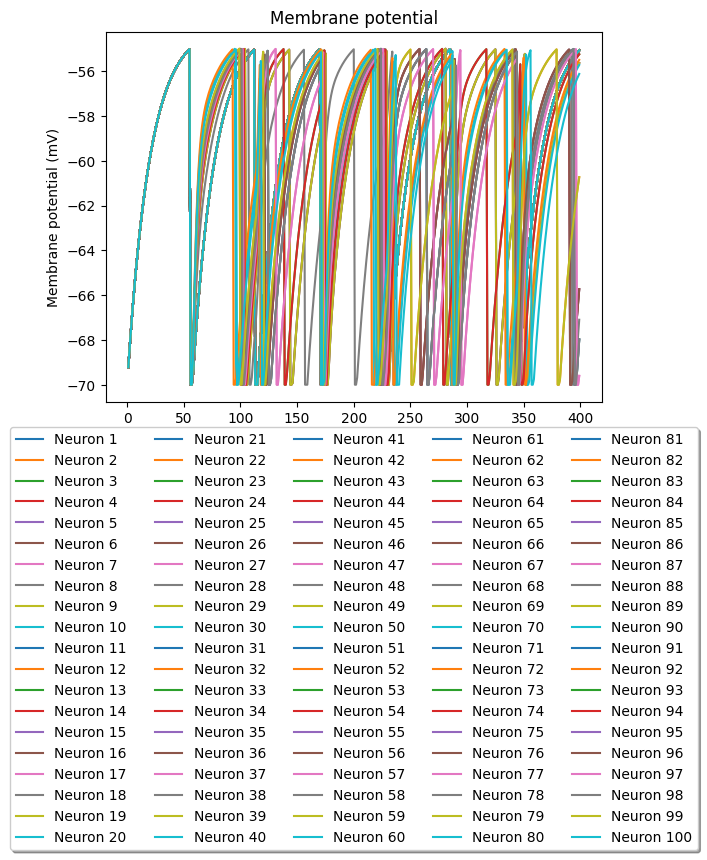

In [11]:
nest.voltage_trace.from_device(voltmeter)
# plt.legend().set_visible(False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

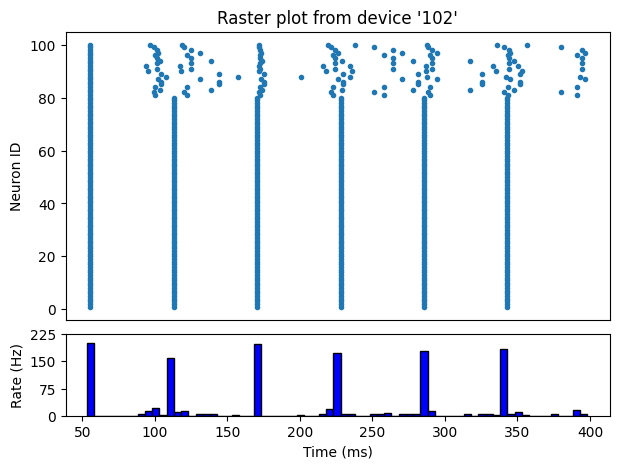

In [12]:
import nest.raster_plot
nest.raster_plot.from_device(spike_recorder, hist=True)
plt.show()

In [13]:
initial_connections = nest.GetConnections(source=excitatory_neuron_nodes, target=inhibitory_neuron_nodes)
initial_weights = nest.GetStatus(initial_connections, 'weight')

# POST LEARNING

In [14]:
# nest.ResetKernel()

In [15]:
params_dict_2 = {"I_e": 200.0, "tau_m": 20.0}

syn_spec_stdp = {
    "model": "stdp_synapse",
    "weight": 20.0,
    "delay": 1.0
}

excitatory_neuron_nodes_2 = nest.Create(model="iaf_psc_alpha", n=80, params=params_dict_2)
inhibitory_neuron_nodes_2 = nest.Create(model="iaf_psc_alpha", n=20, params=params_dict_2)

In [16]:

connection_spec_2 = {"rule": "pairwise_bernoulli", "p": 0.2}
nest.Connect(excitatory_neuron_nodes_2,
             inhibitory_neuron_nodes_2,
             connection_spec_2,
             syn_spec={
                        "synapse_model": "stdp_synapse",
                        "weight": syn_spec_stdp["weight"],
                        "delay": syn_spec_stdp["delay"]
                    })


Jun 08 21:20:10 ConnectionManager [Warning]: 
    New connections created, connection descriptors previously obtained using 
    'GetConnections' are now invalid.


In [17]:
spike_recorder_2 = nest.Create("spike_recorder")
print(spike_recorder_2)

NodeCollection(metadata=None, model=spike_recorder, size=1, first=203)


In [18]:
stimulus_2 = nest.Create("poisson_generator", params={"rate": 1000.0})
nest.Connect(stimulus_2, excitatory_neuron_nodes_2[:10]) 


nest.Connect(excitatory_neuron_nodes_2, spike_recorder_2)
nest.Connect(inhibitory_neuron_nodes_2, spike_recorder_2)

In [19]:
nest.Simulate(400)

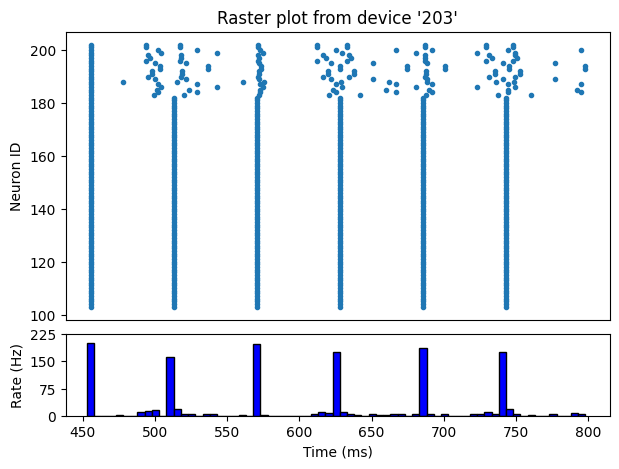

In [20]:
nest.raster_plot.from_device(spike_recorder_2, hist=True)
plt.show()

In [21]:
final_connections = nest.GetConnections(source=excitatory_neuron_nodes_2, target=inhibitory_neuron_nodes_2)
final_weights = nest.GetStatus(final_connections, 'weight')

In [22]:
print(f"Initial mean weight: {np.mean(initial_weights)}")
print(f"Final mean weight: {np.mean(final_weights)}")

Initial mean weight: 20.0
Final mean weight: 22.859383957178995
